In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [82]:
debit_optimiste_pyOpenRiverCam_df = pd.read_csv(R".\artifact\debit_optimiste_pyOpenRiverCam_df.csv")
debit_pessimiste_pyOpenRiverCam_df = pd.read_csv(R".\artifact\debit_pessimiste_pyOpenRiverCam_df.csv")

debit_optimiste_OpenCV_Farnback_df = pd.read_csv(R".\artifact\debit_optimiste_OpenCV_Farnback_df.csv")
debit_pessimiste_OpenCV_Farnback_df = pd.read_csv(R".\artifact\debit_pessimiste_OpenCV_Farnback_df.csv")

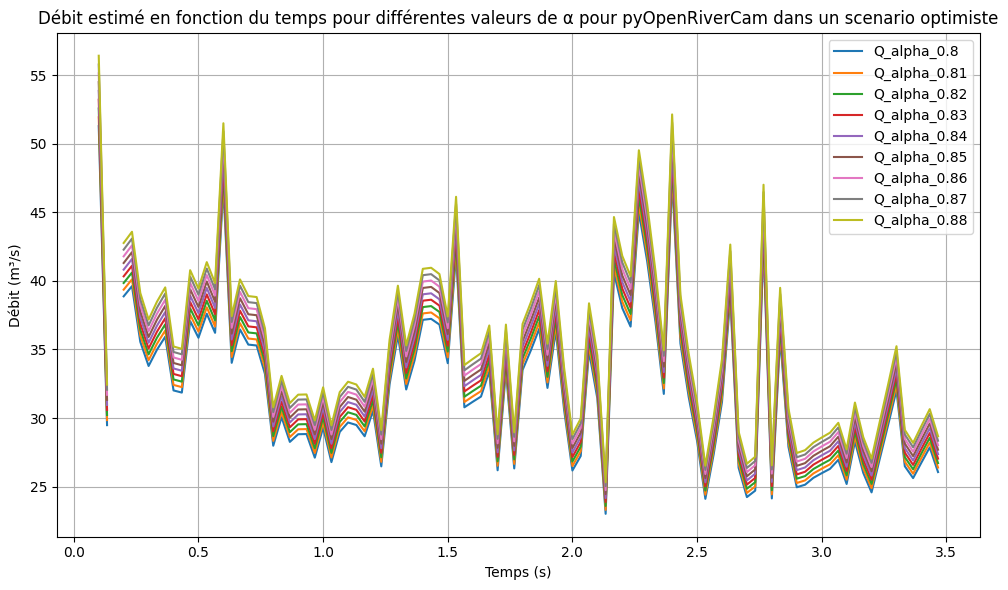

In [83]:
cols_q = [col for col in debit_optimiste_pyOpenRiverCam_df.columns if col.startswith("Q_alpha_")]

plt.figure(figsize=(10, 6))
for col in cols_q:
    plt.plot(debit_optimiste_pyOpenRiverCam_df["time_s"], debit_optimiste_pyOpenRiverCam_df[col], label=col)

plt.xlabel("Temps (s)")
plt.ylabel("Débit (m³/s)")
plt.title("Débit estimé en fonction du temps pour différentes valeurs de α pour pyOpenRiverCam dans un scenario optimiste")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

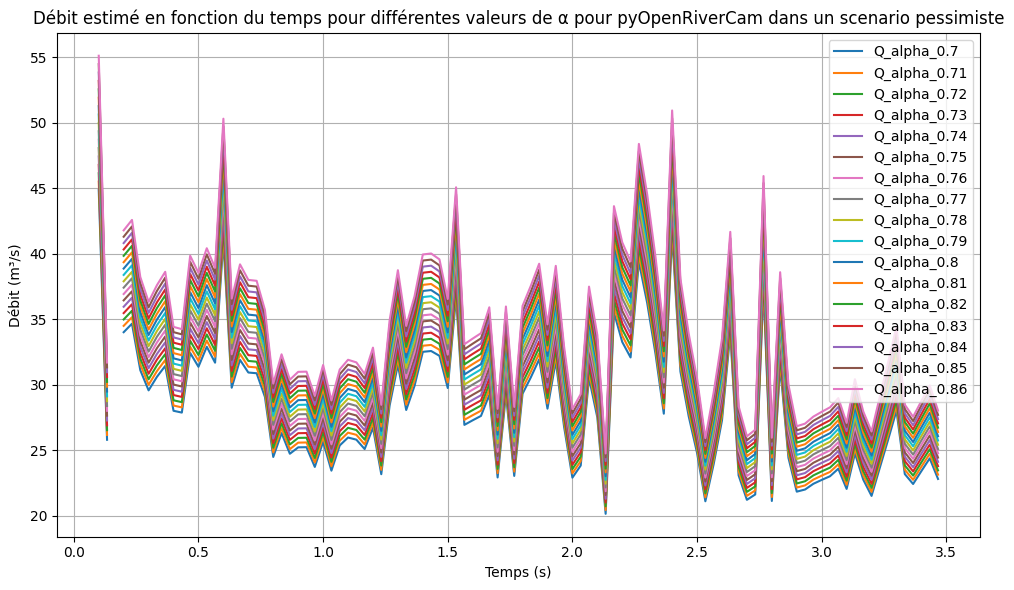

In [84]:
cols_q = [col for col in debit_pessimiste_pyOpenRiverCam_df.columns if col.startswith("Q_alpha_")]

plt.figure(figsize=(10, 6))
for col in cols_q:
    plt.plot(debit_pessimiste_pyOpenRiverCam_df["time_s"], debit_pessimiste_pyOpenRiverCam_df[col], label=col)

plt.xlabel("Temps (s)")
plt.ylabel("Débit (m³/s)")
plt.title("Débit estimé en fonction du temps pour différentes valeurs de α pour pyOpenRiverCam dans un scenario pessimiste")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

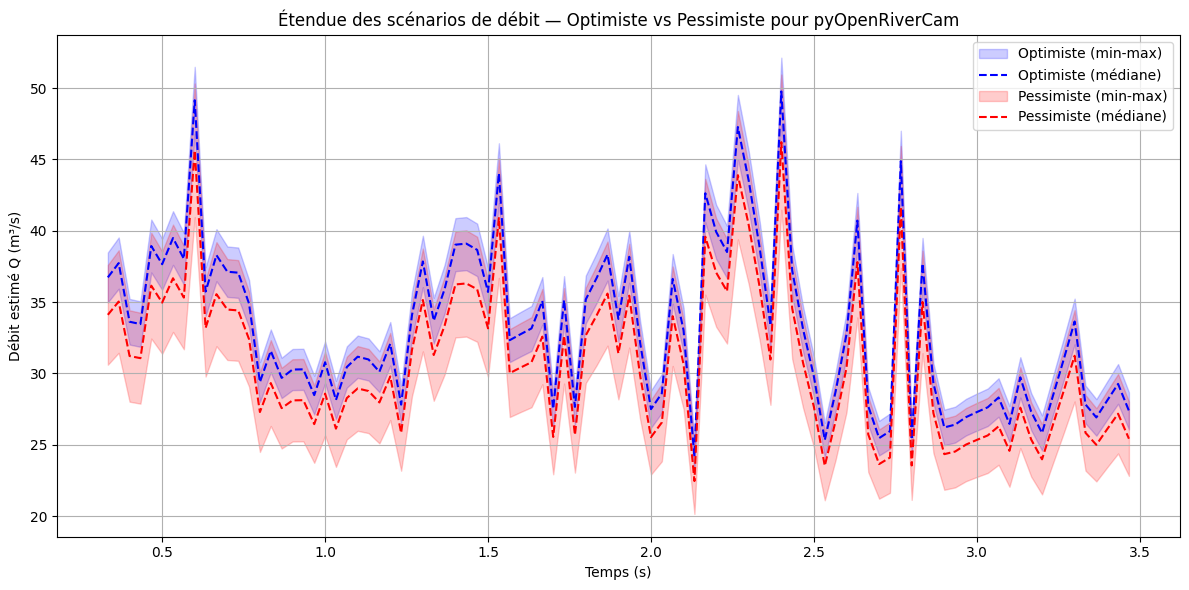

In [85]:
time_s = debit_optimiste_pyOpenRiverCam_df["time_s"]

mask = debit_optimiste_pyOpenRiverCam_df["time_s"] > 0.3 #retrais car non représentatif
time_s = debit_optimiste_pyOpenRiverCam_df["time_s"][mask]

cols_opt = [col for col in debit_optimiste_pyOpenRiverCam_df.columns if col.startswith("Q_alpha_")]
cols_pess = [col for col in debit_pessimiste_pyOpenRiverCam_df.columns if col.startswith("Q_alpha_")]

q_opt_min = debit_optimiste_pyOpenRiverCam_df[cols_opt][mask].min(axis=1)
q_opt_max = debit_optimiste_pyOpenRiverCam_df[cols_opt][mask].max(axis=1)
q_opt_med = debit_optimiste_pyOpenRiverCam_df[cols_opt][mask].median(axis=1)

q_pess_min = debit_pessimiste_pyOpenRiverCam_df[cols_pess][mask].min(axis=1)
q_pess_max = debit_pessimiste_pyOpenRiverCam_df[cols_pess][mask].max(axis=1)
q_pess_med = debit_pessimiste_pyOpenRiverCam_df[cols_pess][mask].median(axis=1)

plt.figure(figsize=(12, 6))

# Enveloppe optimiste
plt.fill_between(time_s, q_opt_min, q_opt_max, color="blue", alpha=0.2, label="Optimiste (min-max)")
plt.plot(time_s, q_opt_med, color="blue", linestyle="--", label="Optimiste (médiane)")

# Enveloppe pessimiste
plt.fill_between(time_s, q_pess_min, q_pess_max, color="red", alpha=0.2, label="Pessimiste (min-max)")
plt.plot(time_s, q_pess_med, color="red", linestyle="--", label="Pessimiste (médiane)")

# Mise en forme
plt.xlabel("Temps (s)")
plt.ylabel("Débit estimé Q (m³/s)")
plt.title("Étendue des scénarios de débit — Optimiste vs Pessimiste pour pyOpenRiverCam")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


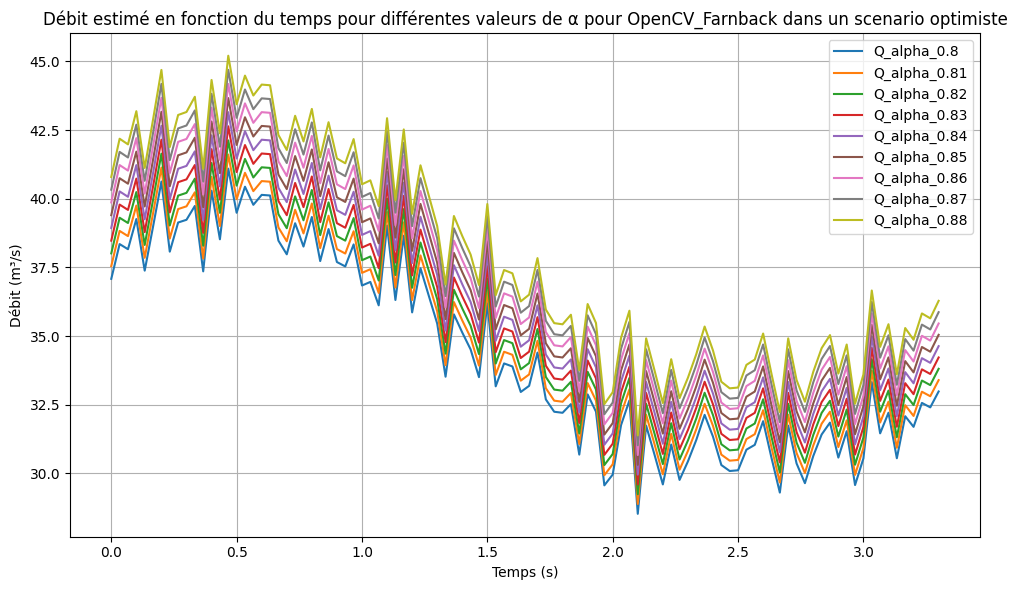

In [86]:
cols_q = [col for col in debit_optimiste_OpenCV_Farnback_df.columns if col.startswith("Q_alpha_")]

plt.figure(figsize=(10, 6))
for col in cols_q:
    plt.plot(debit_optimiste_OpenCV_Farnback_df["time_s"], debit_optimiste_OpenCV_Farnback_df[col], label=col)

plt.xlabel("Temps (s)")
plt.ylabel("Débit (m³/s)")
plt.title("Débit estimé en fonction du temps pour différentes valeurs de α pour OpenCV_Farnback dans un scenario optimiste")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

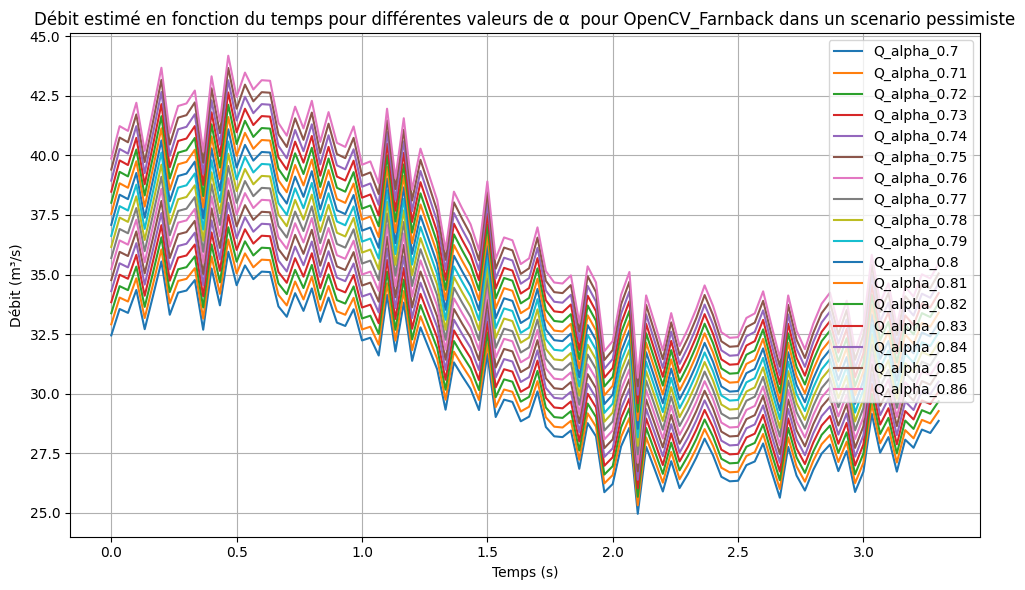

In [87]:
cols_q = [col for col in debit_pessimiste_OpenCV_Farnback_df.columns if col.startswith("Q_alpha_")]

plt.figure(figsize=(10, 6))
for col in cols_q:
    plt.plot(debit_pessimiste_OpenCV_Farnback_df["time_s"], debit_pessimiste_OpenCV_Farnback_df[col], label=col)

plt.xlabel("Temps (s)")
plt.ylabel("Débit (m³/s)")
plt.title("Débit estimé en fonction du temps pour différentes valeurs de α  pour OpenCV_Farnback dans un scenario pessimiste")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

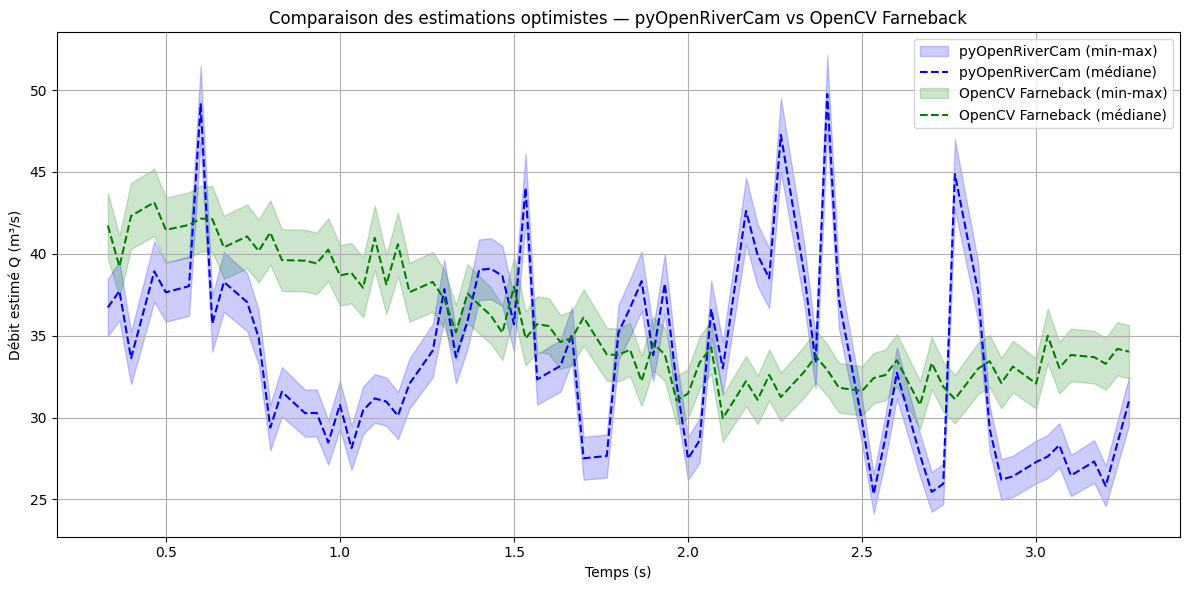

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

# Chargement des fichiers
df_pyrc = pd.read_csv(r".\artifact\debit_optimiste_pyOpenRiverCam_df.csv")
df_farneback = pd.read_csv(r".\artifact\debit_optimiste_OpenCV_Farnback_df.csv")

# Masque temporel (> 0.3 s)
mask_pyrc = df_pyrc["time_s"] > 0.3
mask_farneback = df_farneback["time_s"] > 0.3

# Colonnes de débit
cols_pyrc = [col for col in df_pyrc.columns if col.startswith("Q_alpha_")]
cols_farneback = [col for col in df_farneback.columns if col.startswith("Q_alpha_")]

# Application des masques
df_pyrc = df_pyrc[mask_pyrc]
df_farneback = df_farneback[mask_farneback]

# Temps : intersection des valeurs valides
time_pyrc = df_pyrc["time_s"]
time_farneback = df_farneback["time_s"]

if not time_pyrc.equals(time_farneback):
    time_common = time_pyrc[time_pyrc.isin(time_farneback)].reset_index(drop=True)
    df_pyrc = df_pyrc[df_pyrc["time_s"].isin(time_common)].reset_index(drop=True)
    df_farneback = df_farneback[df_farneback["time_s"].isin(time_common)].reset_index(drop=True)
    time_s = time_common
else:
    time_s = time_pyrc

# Statistiques pyOpenRiverCam
q_pyrc_min = df_pyrc[cols_pyrc].min(axis=1)
q_pyrc_max = df_pyrc[cols_pyrc].max(axis=1)
q_pyrc_med = df_pyrc[cols_pyrc].median(axis=1)

# Statistiques OpenCV Farneback
q_fbk_min = df_farneback[cols_farneback].min(axis=1)
q_fbk_max = df_farneback[cols_farneback].max(axis=1)
q_fbk_med = df_farneback[cols_farneback].median(axis=1)

# Tracé
plt.figure(figsize=(12, 6))

# pyOpenRiverCam
plt.fill_between(time_s, q_pyrc_min, q_pyrc_max, color="blue", alpha=0.2, label="pyOpenRiverCam (min-max)")
plt.plot(time_s, q_pyrc_med, color="blue", linestyle="--", label="pyOpenRiverCam (médiane)")

# OpenCV Farneback
plt.fill_between(time_s, q_fbk_min, q_fbk_max, color="green", alpha=0.2, label="OpenCV Farneback (min-max)")
plt.plot(time_s, q_fbk_med, color="green", linestyle="--", label="OpenCV Farneback (médiane)")

# Mise en page
plt.xlabel("Temps (s)")
plt.ylabel("Débit estimé Q (m³/s)")
plt.title("Comparaison des estimations optimistes — pyOpenRiverCam vs OpenCV Farneback")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()